<a href="https://colab.research.google.com/github/vanowarna/audEng/blob/main/Activity%205/pitch_shifting_fft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive, files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
input_file = '/content/drive/Shareddrives/AlgoPirates/vanowarna/audEng/pitch shifting/cropped_perfect_vocal.wav'
output_file = '/content/drive/Shareddrives/AlgoPirates/vanowarna/audEng/pitch shifting/output_pitch_shifted_fft_1000.wav'

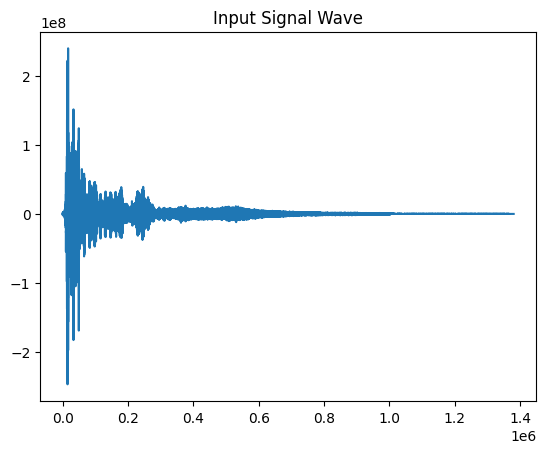

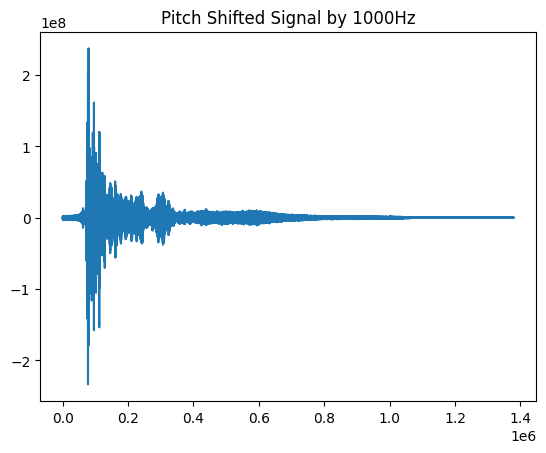

In [7]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import sys

# Open the input audio file
input_wave = wave.open(input_file, 'r')

# Set the parameters for the output file
output_params = list(input_wave.getparams())
output_params[3] = 0
output_params = tuple(output_params)
output_wave = wave.open(output_file, 'w')
output_wave.setparams(output_params)

# Define parameters for processing
frame_rate = 20
frame_size = input_wave.getframerate() // frame_rate  # Read and process 1/frame_rate second at a time
chunk_count = int(input_wave.getnframes() / frame_size)  # Count of the whole file

frequency_shift = 1000 // frame_rate  # Shifting 1000 Hz

# Process audio in chunks
for chunk_num in range(chunk_count):
    # Read frames from the input audio file
    audio_data = np.frombuffer(input_wave.readframes(frame_size), dtype=np.int16)

    # Separate left and right channels
    left_channel, right_channel = audio_data[0::2], audio_data[1::2]

    # Apply FFT to left and right channels
    left_fft, right_fft = np.fft.rfft(left_channel), np.fft.rfft(right_channel)

    # Apply frequency shift
    left_fft, right_fft = np.roll(left_fft, frequency_shift), np.roll(right_fft, frequency_shift)

    # Set the frequency shift bins to zero
    left_fft[0:frequency_shift], right_fft[0:frequency_shift] = 0, 0

    # Apply Inverse FFT to left and right channels
    left_ifft, right_ifft = np.fft.irfft(left_fft), np.fft.irfft(right_fft)

    # Combine left and right channels and write frames to the output file
    processed_signal = np.column_stack((left_ifft, right_ifft)).ravel().astype(np.int16)
    output_wave.writeframes(processed_signal.tobytes())

# Close input and output files
input_wave.close()
output_wave.close()

# Open input file for plotting
input_wave_plot = wave.open(input_file, 'r')

# Read and plot the original signal
original_signal = input_wave_plot.readframes(-1)
original_signal = np.frombuffer(original_signal, 'int16')
left_original, right_original = original_signal[0::2], original_signal[1::2]
fft_left_original, fft_right_original = np.fft.rfft(left_original), np.fft.rfft(right_original)

plt.figure(1)
plt.title('Input Signal Wave')
plt.plot(fft_left_original)

# Open output file for plotting
output_wave_plot = wave.open(output_file, 'r')

# Read and plot the pitch-shifted signal
pitch_shifted_signal = output_wave_plot.readframes(-1)
pitch_shifted_signal = np.frombuffer(pitch_shifted_signal, 'int16')
left_pitch_shifted, right_pitch_shifted = pitch_shifted_signal[0::2], pitch_shifted_signal[1::2]
fft_left_pitch_shifted, fft_right_pitch_shifted = np.fft.rfft(left_pitch_shifted), np.fft.rfft(right_pitch_shifted)

plt.figure(2)
plt.title('Pitch Shifted Signal by 1000Hz')
plt.plot(fft_left_pitch_shifted)